# 0. 데이터 불러오기

In [1]:
# 데이터 불러오기
import pandas as pd
df=pd.read_csv("Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8931-GJJIQ,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.30,803.30,1
1,8808-ELEHO,Male,1,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.25,585.95,1
2,9253-QXKBE,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,2653.65,1
3,5016-ETTFF,Male,0,No,No,10,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,29.50,255.25,1
4,1820-DJFPH,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.05,1709.15,0


# 0-1. 데이터 분리하기

## 20% 를 테스트 셋으로 사용

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2243 non-null   object 
 1   gender            2243 non-null   object 
 2   SeniorCitizen     2243 non-null   int64  
 3   Partner           2243 non-null   object 
 4   Dependents        2243 non-null   object 
 5   tenure            2243 non-null   int64  
 6   PhoneService      2243 non-null   object 
 7   MultipleLines     2243 non-null   object 
 8   InternetService   2243 non-null   object 
 9   OnlineSecurity    2243 non-null   object 
 10  OnlineBackup      2243 non-null   object 
 11  DeviceProtection  2243 non-null   object 
 12  TechSupport       2243 non-null   object 
 13  StreamingTV       2243 non-null   object 
 14  StreamingMovies   2243 non-null   object 
 15  Contract          2243 non-null   object 
 16  PaperlessBilling  2243 non-null   object 


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X=df.drop(columns=['Churn'])
Y=df['Churn']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=125)

In [7]:
X_train.shape

(1794, 20)

## EDA와 전처리를 위해서 train 데이터 결합

In [9]:
import warnings
warnings.filterwarnings('ignore')

train=X_train
train['Churn']=y_train
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1547,4720-VSTSI,Female,0,No,No,44,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3862.55,1
1818,8178-EYZUO,Male,0,No,No,46,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,93.70,4154.80,1
1758,6243-OZGFH,Female,0,No,No,23,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.95,996.85,0
676,0027-KWYKW,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95,0
108,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,214.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,8821-XNHVZ,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,80.05,80.05,1
1859,5835-BEQEU,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.40,1
1279,6250-CGGUN,Male,0,No,No,54,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,84.40,4484.05,0
1250,0867-LDTTC,Male,0,No,No,5,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),75.15,392.65,0


# 1. 데이터 탐색

In [10]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,1794.00000,1794.000000,1794.000000,1794.000000,1794.000000
mean,0.17893,27.731327,67.496739,2004.453763,0.487179
std,0.38340,23.861079,28.749036,2137.253449,0.499975
min,0.00000,1.000000,18.800000,19.000000,0.000000
25%,0.00000,5.000000,45.300000,279.250000,0.000000
50%,0.00000,22.000000,74.825000,1147.050000,0.000000
75%,0.00000,48.000000,90.000000,3119.100000,1.000000
max,1.00000,72.000000,118.600000,8425.300000,1.000000


## 이탈고객과 비이탈 고객의 비율파악

In [11]:
# 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Churn', ylabel='count'>

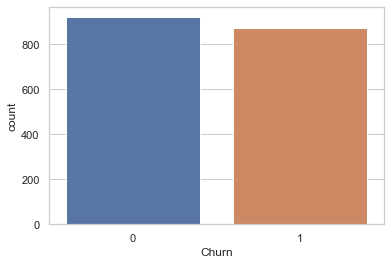

In [12]:
# 그래프 그리기
sns.set(style='whitegrid')
sns.countplot(x="Churn",data=train)

## 비슷

## 성별에 따른 이탈 고객차이

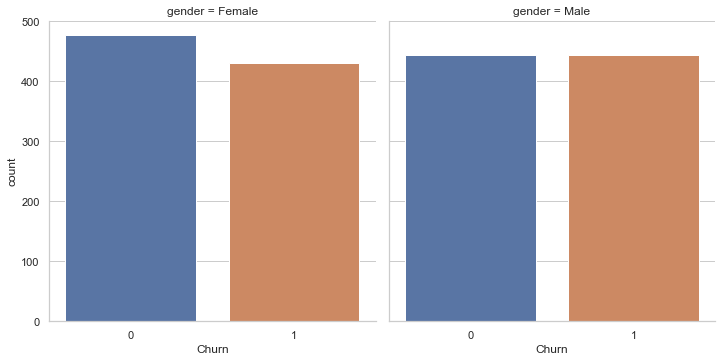

In [13]:
sns.catplot("Churn",col="gender",data=train,kind="count")

## 인터넷 서비스 제공유무에 따른 이탈 고객 차이

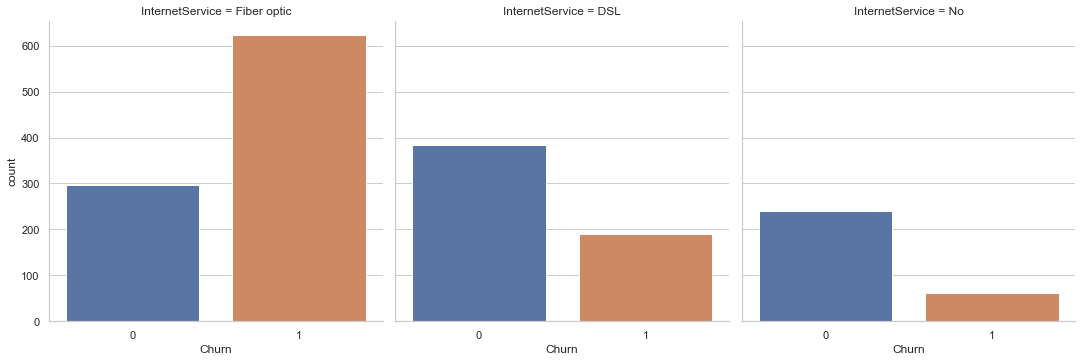

In [14]:
sns.catplot("Churn",col="InternetService",data=train,kind="count")

## 온라인 백업 서비스 제공 유무에 따른 이탈 고객 차이

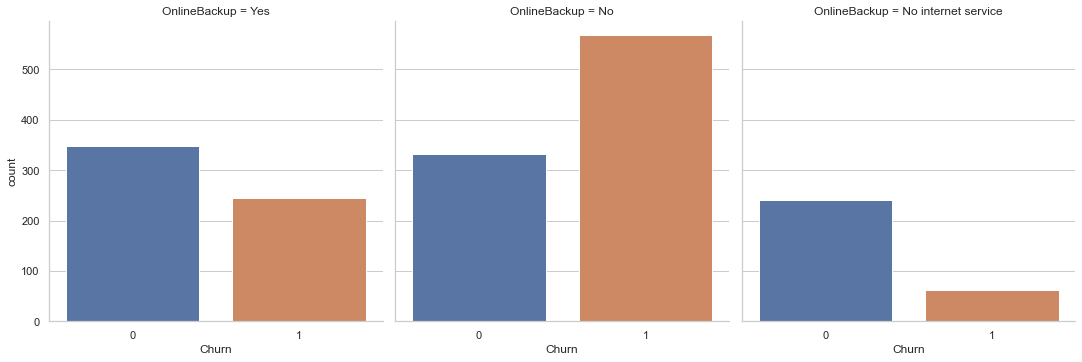

In [15]:
sns.catplot("Churn",col="OnlineBackup",data=train,kind="count")

## 기술 서비스 제공 유무에 따른 이탈 고객 차이

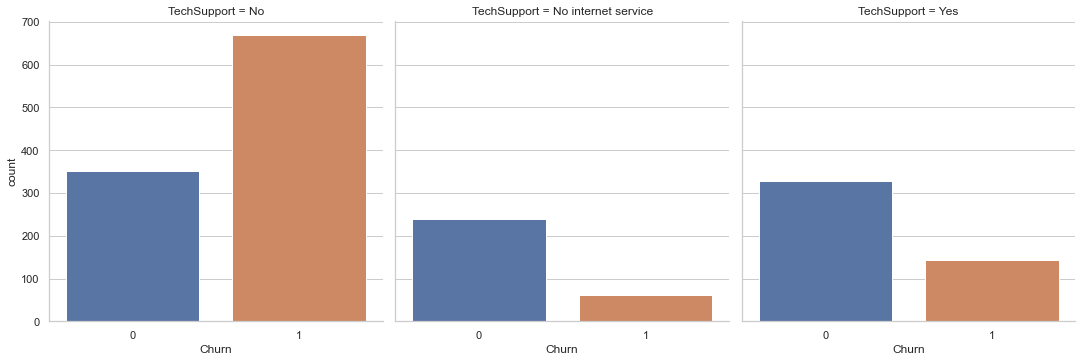

In [16]:
sns.catplot("Churn",col="TechSupport",data=train,kind="count")

## 변수들 내부에서 case별 이탈 고객의 비율

<AxesSubplot:xlabel='InternetService', ylabel='Churn'>

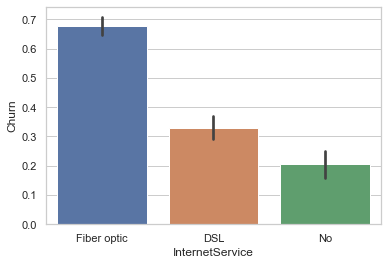

In [18]:
# 인터넷 서비스
sns.barplot(x="InternetService",y="Churn",data=train)

<AxesSubplot:xlabel='OnlineBackup', ylabel='Churn'>

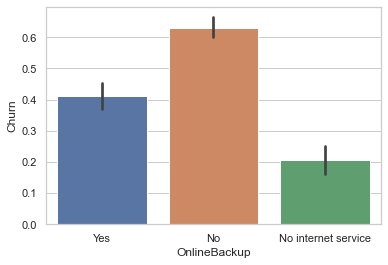

In [19]:
# 온라인 백업
sns.barplot(x="OnlineBackup",y="Churn",data=train)

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

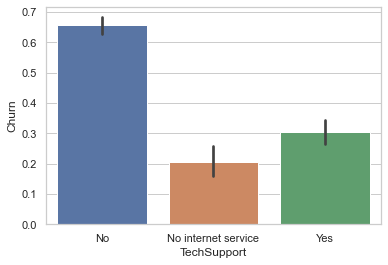

In [20]:
# 기술 서비스 유무
sns.barplot(x="TechSupport",y="Churn",data=train)

# 1-1. Box-plot
## - 연속형 변수의 경우에 사용


## 계약기간에 따른 이탈 비율


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

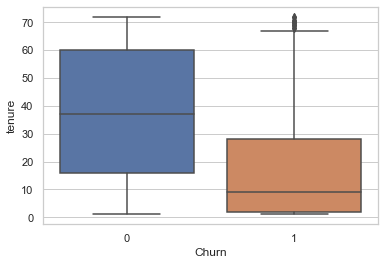

In [24]:
sns.boxplot(x="Churn",y="tenure",data=train)

## 월 납부액에 따른 비율


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

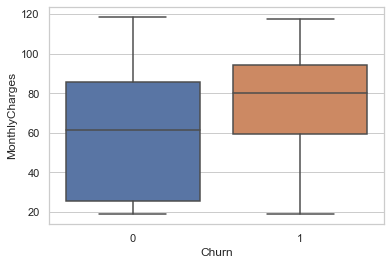

In [25]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=train)

## 총 납부액에 따른 이탈 비율

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

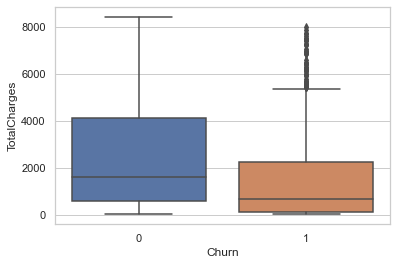

In [26]:
sns.boxplot(x="Churn",y="TotalCharges",data=train)

## 1-2. 상관관계 분석

### 연속형 변수들의 상관관계

In [28]:
train_new=train[['tenure','MonthlyCharges','TotalCharges']]
train_cor=train_new.corr()
train_cor

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.195010,0.854994
MonthlyCharges,0.195010,1.000000,0.564424
TotalCharges,0.854994,0.564424,1.000000


(3.0, 0.0)

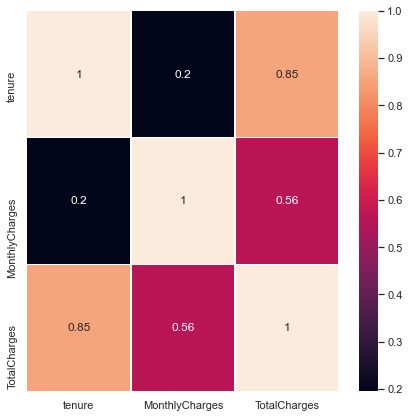

In [29]:
# 히트맵 시각화
plt.figure(figsize=(7,7))

corr_plot=sns.heatmap(data=train_new.corr(),annot=True,linewidth=.5)
corr_plot.set_ylim(3,0)

# 데이터 전처리

In [30]:
# 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1547 to 2205
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1794 non-null   object 
 1   gender            1794 non-null   object 
 2   SeniorCitizen     1794 non-null   int64  
 3   Partner           1794 non-null   object 
 4   Dependents        1794 non-null   object 
 5   tenure            1794 non-null   int64  
 6   PhoneService      1794 non-null   object 
 7   MultipleLines     1794 non-null   object 
 8   InternetService   1794 non-null   object 
 9   OnlineSecurity    1794 non-null   object 
 10  OnlineBackup      1794 non-null   object 
 11  DeviceProtection  1794 non-null   object 
 12  TechSupport       1794 non-null   object 
 13  StreamingTV       1794 non-null   object 
 14  StreamingMovies   1794 non-null   object 
 15  Contract          1794 non-null   object 
 16  PaperlessBilling  1794 non-null   objec

## 이상치 확인

Text(0.5, 0, 'tenure')

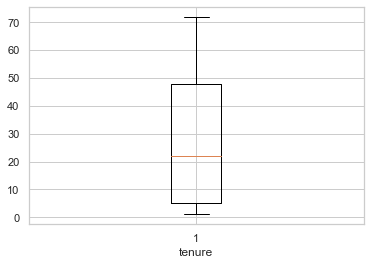

In [31]:
plt.boxplot(train['tenure'])
plt.xlabel('tenure')

Text(0.5, 0, 'MonthlyCharges')

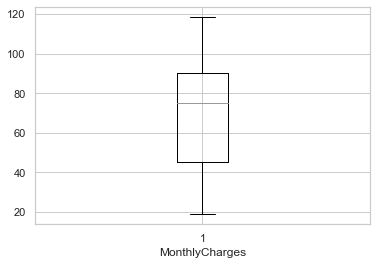

In [32]:
plt.boxplot(train['MonthlyCharges'])
plt.xlabel("MonthlyCharges")

Text(0.5, 0, 'TotalCharges')

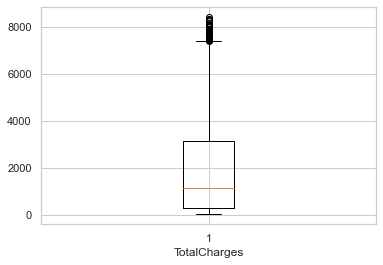

In [33]:
plt.boxplot(train['TotalCharges'])
plt.xlabel("TotalCharges")

## 변수선택
- 위의 EDA 과정에서 관련 변수들 확인
- 필요한 변수만 사용

In [34]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
train_X=train[['tenure','InternetService','OnlineBackup','TechSupport','MonthlyCharges','TotalCharges']]
train_Y=train['Churn']

In [48]:
train_X

,tenure,InternetService,OnlineBackup,TechSupport,MonthlyCharges,TotalCharges
1547,44,Fiber optic,Yes,No,84.80,3862.55
1818,46,Fiber optic,Yes,No,93.70,4154.80
1758,23,DSL,No,No,44.95,996.85
676,23,Fiber optic,No,No,83.75,1849.95
108,11,No,No internet service,No internet service,19.95,214.75
...,...,...,...,...,...,...
1646,1,Fiber optic,No,No,80.05,80.05
1859,3,Fiber optic,No,No,76.95,228.40
1279,54,Fiber optic,No,Yes,84.40,4484.05
1250,5,DSL,No,Yes,75.15,392.65


In [49]:
train_X=pd.get_dummies(train_X)
train_X

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
1547,44,84.80,3862.55,0,1,0,0,0,1,1,0,0
1818,46,93.70,4154.80,0,1,0,0,0,1,1,0,0
1758,23,44.95,996.85,1,0,0,1,0,0,1,0,0
676,23,83.75,1849.95,0,1,0,1,0,0,1,0,0
108,11,19.95,214.75,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1,80.05,80.05,0,1,0,1,0,0,1,0,0
1859,3,76.95,228.40,0,1,0,1,0,0,1,0,0
1279,54,84.40,4484.05,0,1,0,1,0,0,0,0,1
1250,5,75.15,392.65,1,0,0,1,0,0,0,0,1


# 3. 모델학습
## 의사결정나무 모델을 사용

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model=DecisionTreeClassifier()
model=model.fit(train_X,train_Y)

# 4. 예측

## test_data 전처리

In [52]:
test_X=X_test[['tenure','InternetService','OnlineBackup','TechSupport','MonthlyCharges','TotalCharges']]
test_X

,tenure,InternetService,OnlineBackup,TechSupport,MonthlyCharges,TotalCharges
1304,47,Fiber optic,No,No,70.55,3309.25
674,9,Fiber optic,No,No,85.35,754.65
1328,2,No,No internet service,No internet service,18.75,53.15
1274,1,No,No internet service,No internet service,19.30,19.30
1112,2,No,No internet service,No internet service,20.10,39.80
...,...,...,...,...,...,...
1886,15,No,No internet service,No internet service,20.00,288.05
476,33,DSL,No,Yes,73.90,2405.05
2102,5,Fiber optic,No,No,94.45,498.10
985,55,DSL,Yes,No,44.85,2479.05


In [53]:
test_X=pd.get_dummies(test_X)
test_X

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
1304,47,70.55,3309.25,0,1,0,1,0,0,1,0,0
674,9,85.35,754.65,0,1,0,1,0,0,1,0,0
1328,2,18.75,53.15,0,0,1,0,1,0,0,1,0
1274,1,19.30,19.30,0,0,1,0,1,0,0,1,0
1112,2,20.10,39.80,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,15,20.00,288.05,0,0,1,0,1,0,0,1,0
476,33,73.90,2405.05,1,0,0,1,0,0,0,0,1
2102,5,94.45,498.10,0,1,0,1,0,0,1,0,0
985,55,44.85,2479.05,1,0,0,0,0,1,1,0,0


In [54]:
train_X.columns==test_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## 예측

In [55]:
pred=model.predict(test_X)

In [56]:
pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

## 성능평가 

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,pred)

0.7884187082405345

# 5. 하이퍼 파라미터 튜닝

## GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
dtree=DecisionTreeClassifier()

In [68]:
grid_parameters={'max_depth':[1,3,5,7,9,13,15,17,21],
                'min_samples_split':[2,3,4,5,7,10]}

In [69]:
# cv=5로 진행
grid_dtree=GridSearchCV(dtree,param_grid=grid_parameters,cv=5,refit=True)

## 학습

In [71]:
grid_dtree.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 13, 15, 17, 21],
                         'min_samples_split': [2, 3, 4, 5, 7, 10]})

In [72]:
# GridSearchCV  결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002572,0.000513,0.001014,3.385980e-05,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
1,0.002795,0.001164,0.001989,1.254717e-03,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
2,0.003006,0.000912,0.001993,1.260032e-03,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
3,0.002411,0.000512,0.001777,7.375285e-04,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
4,0.002580,0.000772,0.001808,1.203858e-03,1,7,"{'max_depth': 1, 'min_samples_split': 7}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
5,0.002395,0.000795,0.001180,3.727724e-04,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
6,0.002790,0.000399,0.000993,6.512974e-06,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43
7,0.003190,0.001465,0.001395,7.971051e-04,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43
8,0.002193,0.000399,0.000996,1.784161e-07,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43
9,0.002602,0.000494,0.001185,4.063093e-04,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43


In [74]:
grid_dtree.best_params_

{'max_depth': 17, 'min_samples_split': 2}

In [75]:
grid_dtree.best_score_

0.7853954964908731

## 최적 하이퍼파라미터를 활용한 예측

In [77]:
best_tree=DecisionTreeClassifier(max_depth= 17, min_samples_split= 2)
best_tree=best_tree.fit(train_X,train_Y)

In [78]:
pred_best=best_tree.predict(test_X)

In [79]:
accuracy_score(y_test,pred_best)

0.779510022271715